In [3]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences


from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
# import re
# from autocorrect import spell
import regex as re

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import adam_v2
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,MaxPooling1D
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [6]:
data=pd.read_csv('input/1429_1.csv')
data.head()

/tmp/ipykernel_5944/4271306387.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('input/1429_1.csv')


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
# yelp['label'] = ['1' if star > 3 else '0' for star in yelp['stars']];

In [7]:
review=pd.DataFrame(data.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,reviews.rating,No of Users
0,5.0,23775
1,4.0,8541
2,3.0,1499
3,1.0,410
4,2.0,402


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 10))
sns.set_color_codes("pastel")
sns.barplot(y="reviews.rating", x="No of Users", data=review.iloc[:20, :10],label="Score", color="pink")

ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlabel="No of People",ylabel="Rating")
sns.despine(left=True, bottom=True)
plt.show()

In [8]:
permanent = data[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
mpermanent=permanent.dropna()
mpermanent.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [9]:
check =  mpermanent[mpermanent["reviews.text"].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title,reviews.username


In [10]:
actualrating = mpermanent[(mpermanent['reviews.rating'] == 1) | (mpermanent['reviews.rating'] == 5)]
actualrating.shape


(24178, 4)

In [11]:
y = actualrating['reviews.rating']
x = actualrating['reviews.text'].reset_index()
# X =x[xindex(False)]

In [12]:
len(y)
# len(X)

24178

In [13]:
X = x['reviews.text']
print(X)

0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I bought this for my grand daughter when she c...
4        This amazon fire 8 inch tablet is the perfect ...
                               ...                        
24173    This is exactly like any other usb power charg...
24174    Amazon should include this charger with the Ki...
24175    Love my Kindle Fire but I am really disappoint...
24176    I was surprised to find it did not come with a...
24177    to spite the fact that i have nothing but good...
Name: reviews.text, Length: 24178, dtype: object


In [14]:
print(len(X))

24178


In [15]:
import string
from nltk.corpus import stopwords
# stop=set(stopwords.words('english'))
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [17]:
tokens = X[0].split()
print(tokens)

['This', 'product', 'so', 'far', 'has', 'not', 'disappointed.', 'My', 'children', 'love', 'to', 'use', 'it', 'and', 'I', 'like', 'the', 'ability', 'to', 'monitor', 'control', 'what', 'content', 'they', 'see', 'with', 'ease.']


In [18]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# next we need to vectorize our input variable (X)
#we use the count vectoriser function and the analyser we use is the above lines of code
# this should return a vector array
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [20]:
len(bow_transformer.vocabulary_)

16954

In [21]:
review_24 = X[24]

In [22]:
bow_25 = bow_transformer.transform([review_24])
bow_25

<1x16954 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [23]:
print(bow_25)

  (0, 1816)	1
  (0, 2476)	1
  (0, 5664)	1
  (0, 7835)	1
  (0, 10671)	1
  (0, 10778)	1
  (0, 11499)	1
  (0, 11691)	1
  (0, 11940)	1
  (0, 14868)	1
  (0, 15195)	1
  (0, 15507)	1
  (0, 16158)	1
  (0, 16540)	1


In [24]:
X = bow_transformer.transform(X)

In [25]:
#Lets start training the model
from sklearn.model_selection import train_test_split
#using 30% of the data for testing, this will be revised once we do not get the desired accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Naive Bayes Classifier**

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=1)
nb.fit(X_train, y_train)

MultinomialNB()

In [27]:
preds = nb.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_train, y_train)

[[  13  104]
 [  52 7085]]


              precision    recall  f1-score   support

         1.0       0.20      0.11      0.14       117
         5.0       0.99      0.99      0.99      7137

    accuracy                           0.98      7254
   macro avg       0.59      0.55      0.57      7254
weighted avg       0.97      0.98      0.98      7254



0.9839872370597967

In [ ]:
nb = MultinomialNB(alpha=0.5)
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_train, y_train)

In [ ]:
nb = MultinomialNB(alpha=0.1)
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_train, y_train)

In [ ]:
nb = MultinomialNB(alpha=0.4)
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_train, y_train)

**support vector machine**

In [29]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf")
clf.fit(X_train, y_train) 
predsvm=clf.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsvm))
print('\n')
print(classification_report(y_test, predsvm))
predsvm=clf.predict(X_test)
clf.score(X_train,y_train)

[[  13  104]
 [  52 7085]]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       117
         5.0       0.98      1.00      0.99      7137

    accuracy                           0.98      7254
   macro avg       0.49      0.50      0.50      7254
weighted avg       0.97      0.98      0.98      7254



/home/ggdv05/projects/productAnalysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ggdv05/projects/productAnalysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ggdv05/projects/productAnalysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

0.9908414086504372

In [ ]:
for i in range(3,8):
	clf = SVC(kernel="poly",degree=i)
	clf.fit(X_train, y_train)
	predsvmp = clf.predict(X_test)
	print('\n')
	print(confusion_matrix(y_test, predsvmp))
	print(classification_report(y_test, predsvmp))
	predsvmp = clf.predict(X_test)
	clf.score(X_train, y_train)


In [ ]:
clf = SVC(kernel="sigmoid")
clf.fit(X_train, y_train)
predsvms = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, predsvms))
predsvms = clf.predict(X_test)
clf.score(X_train, y_train)

**KNeighborsClassifier**

In [31]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 

KNeighborsClassifier(n_neighbors=3)

In [32]:
predsknn=neigh.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsknn))
print('\n')
print(classification_report(y_test, predsknn))
neigh.score(X_train,y_train)

[[  12  105]
 [   0 7137]]


              precision    recall  f1-score   support

         1.0       1.00      0.10      0.19       117
         5.0       0.99      1.00      0.99      7137

    accuracy                           0.99      7254
   macro avg       0.99      0.55      0.59      7254
weighted avg       0.99      0.99      0.98      7254



0.9835736232569132

**GradientBoostingClassifier**

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train, y_train)
predicted= model.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predicted))
print('\n')
print(classification_report(y_test, predicted))
model.score(X_train,y_train)

[[   0  117]
 [   0 7137]]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       117
         5.0       0.98      1.00      0.99      7137

    accuracy                           0.98      7254
   macro avg       0.49      0.50      0.50      7254
weighted avg       0.97      0.98      0.98      7254



/home/ggdv05/projects/productAnalysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ggdv05/projects/productAnalysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ggdv05/projects/productAnalysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

0.9826873079650201

In [36]:
positive_review = actualrating['reviews.text'][2]
positive_review

'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

In [37]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

5.0

In [38]:
positive_review = actualrating['reviews.text'][11]
positive_review

'Excellent product. Easy to use, large screen makes watching movies and reading easier.'

In [39]:
positive_review_transformed = bow_transformer.transform([positive_review])
model.predict(positive_review_transformed)[0]

5.0

In [40]:
negative_review = mpermanent['reviews.text'][34650]
print(negative_review)

Although the description states that this will work on my Kindle Fire HDX 8.9, when I plug the charger to the Kindle, I receive a message that the charger is not of sufficient wattage to properly charge the Kindle. I bought this charger as a back up for when I travel. The original charger which came with the Kindle does not show this warning when I plug it in.


In [41]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

1.0

In [42]:
negative_review_transformed = bow_transformer.transform([negative_review])
neigh.predict(negative_review_transformed)[0]

5.0

In [43]:
negative_review = mpermanent['reviews.text'][34656]
print(negative_review)

Amazon should include this charger with the Kindle. The fact that they're charging us extra for something that should be included is a sign of cheapness. Plus, you can use any micro-USB phone charger instead of this to charge your Kindle. Save your money.


In [44]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

1.0

In [45]:
negative_review_transformed = bow_transformer.transform([negative_review])
neigh.predict(negative_review_transformed)[0]

1.0

In [46]:
#we need to have a label for 
# lets have a label which group the stars into two groups, 1 for good, 0 for bad 
# so anything more than 3 , 3 being neutral is good, rest bad
# data['label'] = ['1' if reviews.rating > 3 else '0' for reviews.rating in data['reviews.rating']];
mpermanent['label'] = ['1' if star >= 3 else '0' for star in mpermanent['reviews.rating']];

/tmp/ipykernel_5944/2865325864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpermanent['label'] = ['1' if star >= 3 else '0' for star in mpermanent['reviews.rating']];


In [47]:
mpermanent

,reviews.rating,reviews.text,reviews.title,reviews.username,label
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,1
1,5.0,great for beginner or experienced person. Boug...,very fast,truman,1
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,1
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,1
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,1
...,...,...,...,...,...
34655,3.0,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,Kris,1
34656,1.0,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart,0
34657,1.0,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson,0
34658,1.0,I was surprised to find it did not come with a...,Not worth the money,Just the Buyer,0


In [48]:
mpermanent.tail()

,reviews.rating,reviews.text,reviews.title,reviews.username,label
34655,3.0,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,Kris,1
34656,1.0,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart,0
34657,1.0,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson,0
34658,1.0,I was surprised to find it did not come with a...,Not worth the money,Just the Buyer,0
34659,1.0,to spite the fact that i have nothing but good...,as with everyone else,sandi,0


In [49]:
reviews = mpermanent['reviews.text']
labels = mpermanent['label']

In [50]:
print(len(reviews))

34620


In [51]:
print(len(labels))

34620


In [52]:
reviews[3]

"I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands."

In [53]:
stop = set(stopwords.words('english'))

In [54]:
def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
#     doco_clean = [spell(word) for word in doco_clean]
#     p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

In [86]:
# Generate a cleaned reviews array from original review texts
review_cleans = [clean_document(doc) for doc in reviews];
sentences = [' '.join(r) for r in review_cleans ]

In [103]:
print(sentences[7])

gave christmas gift inlaws husband uncle loved easy use fantastic features


In [88]:
print(reviews[7])

I gave this as a Christmas gift to my inlaws, husband and uncle. They loved it and how easy they are to use with fantastic features!


In [89]:
reviews.shape
# sentences.shape

(34620,)

In [90]:
#Keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [91]:
text_sequences = np.array(tokenizer.texts_to_sequences(sentences))
sequence_dict = tokenizer.word_index
word_dict = dict((num, val) for (val, num) in sequence_dict.items())

/tmp/ipykernel_5944/2688887180.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  text_sequences = np.array(tokenizer.texts_to_sequences(sentences))


In [92]:
print(text_sequences)

[list([14, 82, 431, 203, 4, 3, 13, 298, 1357, 129, 212, 166, 308])
 list([1, 666, 1779, 472, 9, 41, 24])
 list([361, 2, 3, 321, 848, 1944, 994, 321, 1587, 201]) ...
 list([4, 7, 11, 31, 431, 7, 436, 80, 399, 244, 125, 446, 75, 68, 239, 65, 125, 239, 360, 787, 13354, 595, 68, 13355, 2321, 13356, 3, 97, 83, 5825, 311, 150, 16, 252])
 list([585, 140, 342, 789, 399, 2697, 54, 10, 224, 13357, 13358, 311, 167, 15, 54, 901, 114, 185, 350, 37, 6])
 list([4518, 304, 413, 8, 74, 147, 6, 13359, 185, 803, 4, 11, 140, 13360, 1288, 311, 342, 7, 307, 380, 72, 307, 619, 576, 482, 561, 311, 117, 154, 6, 143, 74, 141, 528, 187, 37, 7, 95, 311, 10, 94, 1294, 32, 10])]


In [93]:
reviews_encoded = [];
for i,review in enumerate(review_cleans):
    reviews_encoded.append([sequence_dict[x] for x in review]);

(array([   7.,   72.,  114.,  211.,  873., 2238., 3498., 3492., 3038.,
        2426., 2066., 1715., 1440., 1358., 1159.,  946.,  898.,  798.,
         742.,  646.,  599.,  537.,  466.,  783.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <BarContainer object of 24 artists>)

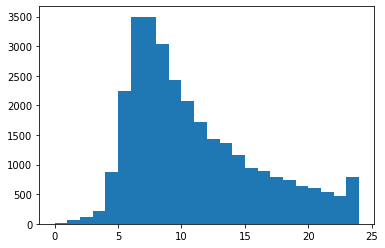

In [94]:
lengths = [len(x) for x in reviews_encoded]
plt.hist(lengths, bins=range(25))

In [95]:
print(reviews_encoded[135])

[807, 6, 2, 8, 2, 12, 938, 521, 293, 153, 1709, 728, 659, 8, 395, 3, 2, 138, 547, 433, 110, 1948, 70, 1242, 15, 43, 187, 113, 253, 1536, 2]


In [96]:
max_cap =8;
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')

In [97]:
Y = np.array([[0,1] if '0' in label else [1,0] for label in labels])

In [98]:
np.random.seed(1024);
random_posits = np.arange(len(X))
np.random.shuffle(random_posits);

In [99]:
X = X[random_posits];
Y = Y[random_posits];

In [100]:
train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));

In [101]:
X_train, Y_train = X[:train_cap], Y[:train_cap]
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap]
X_test1, Y_test1 = X[dev_cap:], Y[dev_cap:]

In [116]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import adam_v2 
from keras.layers import LSTM
from keras.layers.embeddings import Embedding


model1 = Sequential();
model1.add(Embedding(len(word_dict)+1, max_cap, input_length=max_cap));
#adding a LSTM layer of dim 1--
model1.add(LSTM(150, return_sequences=True));
model1.add(LSTM(150, return_sequences=False));
#adding a dense layer with activation function of relu
model1.add(Dense(100, activation='relu', kernel_initializer='uniform'));#best 50,relu
#adding the final output activation with activation function of softmax
model1.add(Dense(2, activation='sigmoid', kernel_initializer='uniform'));
print(model1.summary())
# optimizer = Adam(lr=0.0001, decay=0.0001);
optimizer = adam_v2.Adam(learning_rate=0.0001, decay=0.0001) 

model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model and run it for 5 epochs
model1.fit(X_train, Y_train, batch_size=16, epochs=5, validation_data=(X_dev, Y_dev))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 8, 8)              106888    
                                                                 
 lstm_12 (LSTM)              (None, 8, 150)            95400     
                                                                 
 lstm_13 (LSTM)              (None, 150)               180600    
                                                                 
 dense_7 (Dense)             (None, 100)               15100     
                                                                 
 dense_8 (Dense)             (None, 2)                 202       
                                                                 
Total params: 398,190
Trainable params: 398,190
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1840/1840 [======================

In [118]:
score = model1.evaluate(X_test1, Y_test1)
print("Test accuracy: %0.4f%%" % (score[1]*100))

76/76 [==============================] - 0s 4ms/step - loss: 0.1075 - accuracy: 0.9744
Test accuracy: 97.4422%


In [120]:
my_reviews = ['This is a great product']
my_reviews_clean = [ clean_document(doc) for doc in my_reviews]
my_sentences = [' '.join(r) for r in my_reviews_clean]